In [2]:
import pandas as pd
import supy as sp
import matplotlib.pyplot as plt
from functions.night import *
from functions.dict_legend import *
from scipy.stats import pearsonr, linregress
#from sklearn.linear_model import LinearRegression
in_folder = '../data/'
sp.show_version()

SuPy version: 2024.3.14.dev0
-------------


In [3]:
# Polynomial Regression
def polyfiter(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)
     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    correlation = np.corrcoef(x, y)[0,1]

     # r
    results['correlation'] = correlation
     # r-squared
    results['determination'] = correlation**2

    return results

def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalues[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return pvalues

In [4]:
s_rc = in_folder + 'sample_data/RunControl.nml'         # OHM. Sampledata Q* modelled with L↓ modelled using air temperature and relative humidity supplied in meteorological forcing file [Loridan et al., 2011]. Zenith angle not accounted for in albedo calculation.d
s2_rc = in_folder + 'sample_data2/RunControl.nml'       # Sampledata SpartacusESTM, standard values in GridLayout
s3_rc = in_folder + 'sample_data3/RunControl.nml'       # Sampledata SpartacusESTM Thicker first layer wall all three layers. 1.2 instad of .2
s3x_rc = in_folder + 'sample_data3x/RunControl.nml'     # Sampledata SpartacusESTM Thicker first layer wall all three layers. 1.2 and 1.1 on second layer
s4_rc = in_folder + 'sample_data4/RunControl.nml'       # Sampledata SpartacusESTM wall albedo lowered .25 instad of .5
s5_rc = in_folder + 'sample_data5/RunControl.nml'       # Sampledata SpartacusESTM wall emissivity lower .9 instead of .95
s6_rc = in_folder + 'sample_data6/RunControl.nml'       # Sampledata SpartacusESTM Thermal conductivity of layer 1 lower. .8 instead of 1.2
s7_rc = in_folder + 'sample_data7/RunControl.nml'       # Sampledata SpartacusESTM Thermal conductivity of layer 2 (insulation) lower. .2 instead of 1.2

df_state_init_s = sp.init_supy(s_rc)
df_state_init_s2 = sp.init_supy(s2_rc)
df_state_init_s3 = sp.init_supy(s3_rc)
df_state_init_s3x = sp.init_supy(s3x_rc)
df_state_init_s4 = sp.init_supy(s4_rc)
df_state_init_s5 = sp.init_supy(s5_rc)
df_state_init_s6 = sp.init_supy(s6_rc)
df_state_init_s7 = sp.init_supy(s7_rc)

2024-03-19 09:43:44,882 - SuPy - INFO - All cache cleared.
2024-03-19 09:43:46,332 - SuPy - INFO - All cache cleared.
2024-03-19 09:43:47,681 - SuPy - INFO - All cache cleared.
2024-03-19 09:43:49,108 - SuPy - INFO - All cache cleared.
2024-03-19 09:43:50,431 - SuPy - INFO - All cache cleared.
2024-03-19 09:43:51,732 - SuPy - INFO - All cache cleared.
2024-03-19 09:43:53,098 - SuPy - INFO - All cache cleared.
2024-03-19 09:43:54,404 - SuPy - INFO - All cache cleared.


In [5]:
# standard settings
#print(df_state_init_s.columns.tolist())
df_state_init_s.filter(like='sfr')


var     sfr_surf                                  
ind_dim     (0,)  (1,) (2,)  (3,)  (4,) (5,)  (6,)
grid                                              
1           0.43  0.38  0.0  0.02  0.03  0.0  0.14

In [6]:
# standard wall thickness
df_state_init_s2.loc[:, 'dz_wall']

ind_dim,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)","(2, 0)","(2, 1)","(2, 2)","(2, 3)","(2, 4)"
grid,,,,,,,,,,,,,,,
1,0.2,0.1,0.1,0.01,0.01,0.2,0.1,0.1,0.01,0.01,0.2,0.1,0.1,0.01,0.01


In [7]:
# standard wall cp
df_state_init_s2.loc[:, 'cp_wall']

ind_dim,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)","(2, 0)","(2, 1)","(2, 2)","(2, 3)","(2, 4)"
grid,,,,,,,,,,,,,,,
1,3000000.0,2000000.0,2000000.0,2000000.0,2000000.0,2000000.0,3000000.0,2000000.0,2000000.0,2000000.0,2000000.0,3000000.0,2000000.0,2000000.0,2000000.0


In [8]:
# standard wall k
df_state_init_s2.loc[:, 'k_wall']

ind_dim,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)","(2, 0)","(2, 1)","(2, 2)","(2, 3)","(2, 4)"
grid,,,,,,,,,,,,,,,
1,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2


In [9]:
# wall with new k in insulation layer (2)
df_state_init_s7.loc[:, 'k_wall']

ind_dim,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)","(2, 0)","(2, 1)","(2, 2)","(2, 3)","(2, 4)"
grid,,,,,,,,,,,,,,,
1,1.2,0.2,1.2,1.2,1.2,1.2,0.2,1.2,1.2,1.2,1.2,0.2,1.2,1.2,1.2


In [10]:
# Metdata
grid = df_state_init_s.index[0]
df_forcing = sp.load_forcing_grid(s_rc, grid)
s = '2012 07 1'
s2 = '2012 07 10'
e = '2012 07 31'

# # warm week 2012  to reduce time for test setup
df_forcing=df_forcing.loc[s: e].iloc[1:]
df_forcing2=df_forcing.loc[s2: e].iloc[1:]


2024-03-19 09:43:56,039 - SuPy - INFO - All cache cleared.


In [11]:
df_output_s2, df_state_final_s2 = sp.run_supy(df_forcing, df_state_init_s2)
df_output_s2b, df_state_final_s2b = sp.run_supy(df_forcing2, df_state_init_s2)

2024-03-19 09:44:05,298 - SuPy - INFO - ====================
2024-03-19 09:44:05,299 - SuPy - INFO - Simulation period:
2024-03-19 09:44:05,300 - SuPy - INFO -   Start: 2012-07-01 00:05:00
2024-03-19 09:44:05,301 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-03-19 09:44:05,302 - SuPy - INFO - 
2024-03-19 09:44:05,302 - SuPy - INFO - No. of grids: 1
2024-03-19 09:44:05,303 - SuPy - INFO - SuPy is running in serial mode
2024-03-19 09:49:40,714 - SuPy - INFO - Execution time: 335.4 s
2024-03-19 09:49:40,716 - SuPy - INFO - ====================

2024-03-19 09:49:40,717 - SuPy - INFO - ====================
2024-03-19 09:49:40,718 - SuPy - INFO - Simulation period:
2024-03-19 09:49:40,721 - SuPy - INFO -   Start: 2012-07-10 00:05:00
2024-03-19 09:49:40,722 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-03-19 09:49:40,724 - SuPy - INFO - 
2024-03-19 09:49:40,725 - SuPy - INFO - No. of grids: 1
2024-03-19 09:49:40,727 - SuPy - INFO - SuPy is running in serial mode
2024-03-19 09:53:34,031 - 

<AxesSubplot:title={'center':'Testing spinup time for Spartacus'}, xlabel='datetime'>

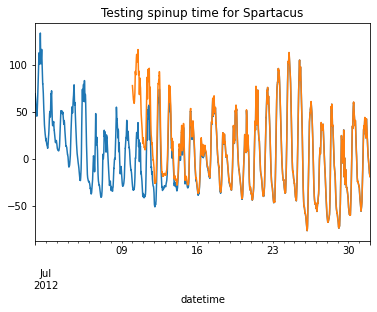

In [12]:
# check spin-up time
df_output_s2.SUEWS.loc[grid].loc[:,'QS'].plot(title='Testing spinup time for Spartacus')
df_output_s2b.SUEWS.loc[grid].loc[:,'QS'].plot()

2024-03-19 09:53:41,252 - SuPy - INFO - All cache cleared.


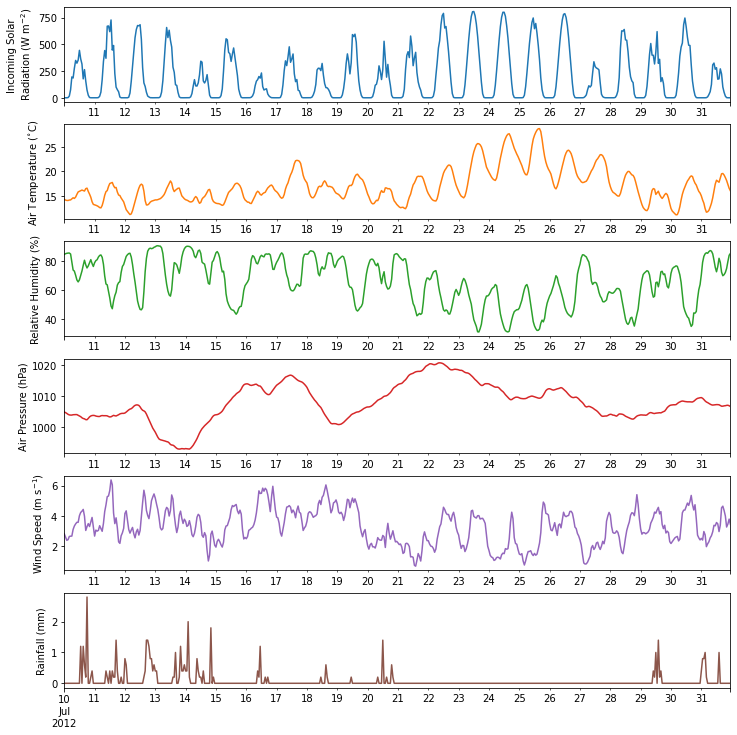

In [13]:
# looks like one week spinup is ok
#load full dataset again and select short period for further inspection
df_forcing = sp.load_forcing_grid(s_rc, grid)
df_forcing=df_forcing.loc[s2: e].iloc[1:]


# plot forcing data
df_plot_forcing_x = df_forcing.loc[:, list_var_forcing].copy().shift(
    -1).dropna(how='any')
df_plot_forcing = df_plot_forcing_x.resample('1h').mean()
df_plot_forcing['rain'] = df_plot_forcing_x['rain'].resample('1h').sum()

axes = df_plot_forcing.plot(
    subplots=True,
    figsize=(10, 12),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])

# Run

In [14]:
df_output_s, df_state_final_s = sp.run_supy(df_forcing, df_state_init_s)
df_output_s2, df_state_final_s2 = sp.run_supy(df_forcing, df_state_init_s2)
df_output_s3, df_state_final_s3 = sp.run_supy(df_forcing, df_state_init_s3)
df_output_s3x, df_state_final_s3x = sp.run_supy(df_forcing, df_state_init_s3x)
df_output_s4, df_state_final_s4 = sp.run_supy(df_forcing, df_state_init_s4)
df_output_s5, df_state_final_s5 = sp.run_supy(df_forcing, df_state_init_s5)
df_output_s6, df_state_final_s6 = sp.run_supy(df_forcing, df_state_init_s6)
df_output_s7, df_state_final_s7 = sp.run_supy(df_forcing, df_state_init_s7)

2024-03-19 09:53:51,020 - SuPy - INFO - ====================
2024-03-19 09:53:51,021 - SuPy - INFO - Simulation period:
2024-03-19 09:53:51,022 - SuPy - INFO -   Start: 2012-07-10 00:05:00
2024-03-19 09:53:51,023 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-03-19 09:53:51,023 - SuPy - INFO - 
2024-03-19 09:53:51,024 - SuPy - INFO - No. of grids: 1
2024-03-19 09:53:51,024 - SuPy - INFO - SuPy is running in serial mode
2024-03-19 09:53:54,893 - SuPy - INFO - Execution time: 3.9 s
2024-03-19 09:53:54,894 - SuPy - INFO - ====================

2024-03-19 09:53:54,895 - SuPy - INFO - ====================
2024-03-19 09:53:54,897 - SuPy - INFO - Simulation period:
2024-03-19 09:53:54,898 - SuPy - INFO -   Start: 2012-07-10 00:05:00
2024-03-19 09:53:54,900 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-03-19 09:53:54,901 - SuPy - INFO - 
2024-03-19 09:53:54,903 - SuPy - INFO - No. of grids: 1
2024-03-19 09:53:54,904 - SuPy - INFO - SuPy is running in serial mode
2024-03-19 09:57:44,965 - Su

In [15]:
# Start and end date for inspection
s = '2012-07-10'
e = '2012-07-30'

# OHM
# Spartacus_2           Sampledata Spartacus, standard values in GridLayout
# Spartacus_3           Sampledata Spartacus Thicker first layer wall all three layers. 1.2 instad of .2
# Spartacus_3x          Sampledata Spartacus Thicker first layer wall all three layers. 1.2 and 1.1 on second layer
# Spartacus_4           Sampledata Spartacus wall albedo lowered .25 instad of .5
# Spartacus_5           Sampledata Spartacus wall emissivity lower .9 instead of .95
# Spartacus_6           Sampledata Spartacus Thermal conductivity of layer 1 lower. .8 instead of 1.2
# Spartatus_7           Sampledata Spartacus Thermal conductivity of layer 2 lower. .2 instead of 1.2

outputIn = [df_output_s.loc[grid].loc[s:e,:],df_output_s2.loc[grid].loc[s:e,:], df_output_s3.loc[grid].loc[s:e,:], df_output_s3x.loc[grid].loc[s:e,:],df_output_s4.loc[grid].loc[s:e,:], df_output_s5.loc[grid].loc[s:e,:], df_output_s6.loc[grid].loc[s:e,:], df_output_s7.loc[grid].loc[s:e,:], ]
namesIn = ['OHM', 'SS_default_alb0.5_emis0.95_k1.2', 'SS_thickerwallAll', 'SS_thickerwallVary','SS_alb0.25', 'SS_emis0.90','SS_k0.8first', 'SS_k0.2second',]
df_output_merge_x=pd.concat(outputIn,axis=1,join='inner', keys = namesIn).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1) #.loc[grid]
df_merge=df_output_merge_x.SUEWS

outputInNoOHM = [df_output_s2.loc[grid].loc[s:e,:], df_output_s3.loc[grid].loc[s:e,:], df_output_s3x.loc[grid].loc[s:e,:],df_output_s4.loc[grid].loc[s:e,:], df_output_s5.loc[grid].loc[s:e,:], df_output_s6.loc[grid].loc[s:e,:], df_output_s7.loc[grid].loc[s:e,:], ]
namesInNoOHM = ['SS_default_alb0.5_emis0.95_k1.2', 'SS_thickerwallAll', 'SS_thickerwallVary','SS_alb0.25', 'SS_emis0.90','SS_k0.8first', 'SS_k0.2second',]
df_output_merge_xNOOHM=pd.concat(outputInNoOHM,axis=1,join='inner', keys = namesInNoOHM).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1) #.loc[grid]
df_mergeNoOHM=df_output_merge_xNOOHM.SUEWS

# add available energy, AE
df_merge=df_merge.stack().eval('AE=QN+QF-QS').unstack()

#df_merge = merge_output([df_output_s2, df_output_s3, df_output_s3x,df_output_s4, df_output_s5, df_output_s6, df_output_s7, ], ['Spartacus_2', 'Spartacus_3', 'Spartacus_3x','Spartacus_4', 'Spartacus_5','Spartacus_6', 'Spartacus_7',])

# Plot

In [16]:
# Start and end date for inspection
s = '2012-07-21'
e = '2012-07-30'

In [17]:
df_merge = df_merge.stack().eval('BowenRatio=QH/QE').unstack()
df_merge = df_merge.stack().eval('QS_f=QS/(QN+QF)').unstack()
df_merge = df_merge.stack().eval('QH_f=QH/(QN+QF)').unstack()
df_merge = df_merge.stack().eval('QE_f=QE/(QN+QF)').unstack()


<AxesSubplot:title={'center':'Qs for one warm week in July'}, xlabel='datetime'>

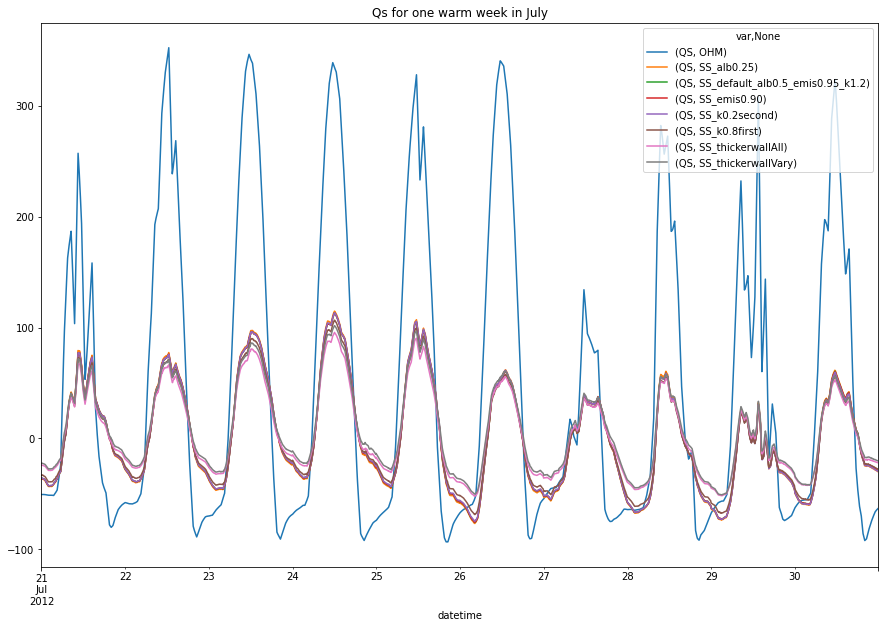

In [18]:
var = 'QS'

df_merge.loc[s:e,[var]].plot(figsize=(15,10), title='Qs for one warm week in July')

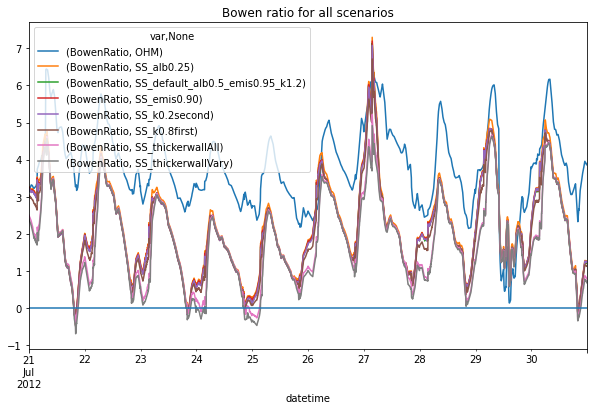

In [19]:
#This is probably not correct as we use very short spin-up time

var = 'BowenRatio'

# s = '2012-07-28 15:00'
# e = '2012-07-28 17:00'

ax = df_merge.loc[s:e,[var]].plot(figsize=(10,6), title='Bowen ratio for all scenarios')
# df_merge.loc[s:e,[var]]

ax.axhline(0,0)

var                 BowenRatio                                             \
                           OHM SS_alb0.25 SS_default_alb0.5_emis0.95_k1.2   
datetime                                                                    
2012-07-26 00:00:00   2.613386   1.841665                        1.790352   
2012-07-26 00:05:00   2.603428   1.840242                        1.787736   
2012-07-26 00:10:00   2.593360   1.842392                        1.790380   
2012-07-26 00:15:00   2.583170   1.845966                        1.793028   
2012-07-26 00:20:00   2.572847   1.848188                        1.796469   
...                        ...        ...                             ...   
2012-07-30 23:35:00   3.886121   1.263516                        1.224630   
2012-07-30 23:40:00   3.876662   1.277546                        1.223496   
2012-07-30 23:45:00   3.867290   1.277041                        1.206292   
2012-07-30 23:50:00   3.857992   1.276199                        1.220667   
2012-07-30 23:55:00   3.892864   1.266507                        1.210409   

var                                                                           \
                    SS_emis0.90 SS_k0.2second SS_k0.8first SS_thickerwallAll   
datetime                                                                       
2012-07-26 00:00:00    1.808833      1.752047     1.591265          1.131110   
2012-07-26 00:05:00    1.807167      1.755141     1.585486          1.119853   
2012-07-26 00:10:00    1.808983      1.756548     1.587064          1.111783   
2012-07-26 00:15:00    1.811515      1.758559     1.586333          1.104184   
2012-07-26 00:20:00    1.814512      1.760779     1.586146          1.096570   
...                         ...           ...          ...               ...   
2012-07-30 23:35:00    1.230732      1.244401     1.134735          0.826371   
2012-07-30 23:40:00    1.244962      1.258547     1.147133          0.818427   
2012-07-30 23:45:00    1.244299      1.257895     1.144682          0.810371   
2012-07-30 23:50:00    1.243296      1.256900     1.141869          0.782643   
2012-07-30 23:55:00    1.233302      1.246829     1.132112          0.786886   

var                                     
                    SS_thickerwallVary  
datetime                                
2012-07-26 00:00:00           1.015651  
2012-07-26 00:05:00           1.005379  
2012-07-26 00:10:00           0.996947  
2012-07-26 00:15:00           0.988778  
2012-07-26 00:20:00           0.980551  
...                                ...  
2012-07-30 23:35:00           0.726668  
2012-07-30 23:40:00           0.718637  
2012-07-30 23:45:00           0.710389  
2012-07-30 23:50:00           0.679545  
2012-07-30 23:55:00           0.683518  

[1440 rows x 8 columns]

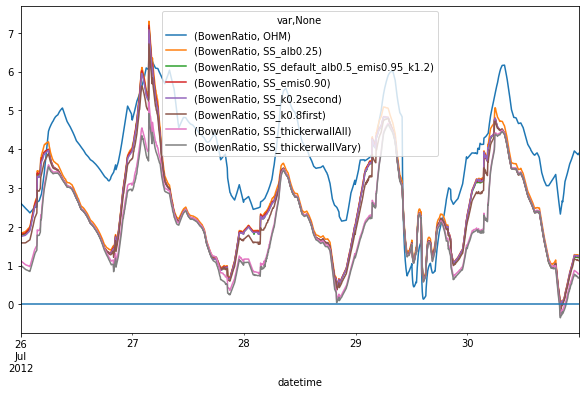

In [20]:
var = 'BowenRatio'
s = '2012-07-26'
e = '2012-07-30'

ax = df_merge.loc[s:e,[var]].plot(figsize=(10,6))
ax.axhline(0,0)

df_merge.loc[s:e,[var]]


var                 BowenRatio                                             \
                           OHM SS_alb0.25 SS_default_alb0.5_emis0.95_k1.2   
datetime                                                                    
2012-07-26 18:30:00   3.243792   1.463499                        1.374583   
2012-07-26 18:35:00   3.237095   1.457859                        1.363542   
2012-07-26 18:40:00   3.229968   1.450805                        1.360850   
2012-07-26 18:45:00   3.205748   1.449330                        1.353844   
2012-07-26 18:50:00   3.197917   1.436175                        1.341451   
2012-07-26 18:55:00   3.189900   1.427617                        1.339965   
2012-07-26 19:00:00   3.181819   1.427097                        1.327049   

var                                                                           \
                    SS_emis0.90 SS_k0.2second SS_k0.8first SS_thickerwallAll   
datetime                                                                       
2012-07-26 18:30:00    1.376205      1.369946     1.364708          1.326164   
2012-07-26 18:35:00    1.370465      1.362881     1.356519          1.307668   
2012-07-26 18:40:00    1.368658      1.355639     1.346975          1.295914   
2012-07-26 18:45:00    1.357027      1.348355     1.342321          1.279144   
2012-07-26 18:50:00    1.349490      1.341053     1.327179          1.256669   
2012-07-26 18:55:00    1.342491      1.328000     1.322249          1.236794   
2012-07-26 19:00:00    1.335828      1.319955     1.305828          1.216032   

var                                     
                    SS_thickerwallVary  
datetime                                
2012-07-26 18:30:00           1.272739  
2012-07-26 18:35:00           1.256239  
2012-07-26 18:40:00           1.234368  
2012-07-26 18:45:00           1.219784  
2012-07-26 18:50:00           1.194663  
2012-07-26 18:55:00           1.172084  
2012-07-26 19:00:00           1.148355

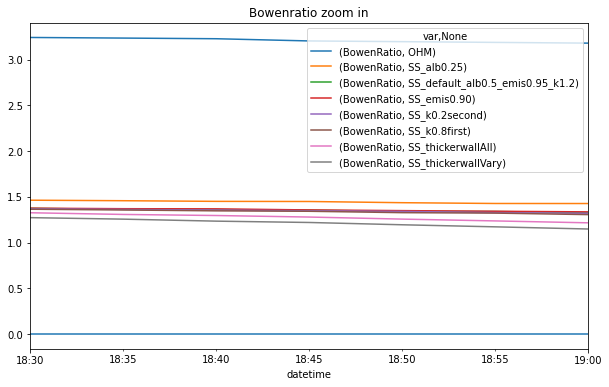

In [21]:
var = 'BowenRatio'

s = '2012-07-26 18:30'
e = '2012-07-26 19:00'

ax = df_merge.loc[s:e,[var]].plot(figsize=(10,6),title='Bowenratio zoom in')
ax.axhline(0,0)

df_merge.loc[s:e,[var]]

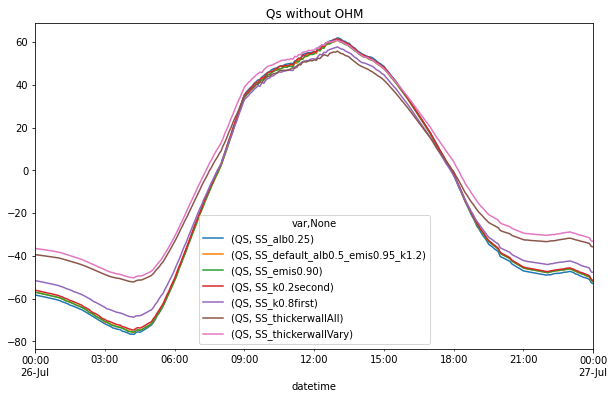

In [22]:
var = 'QS'

s = '2012-07-26 00:00'
e = '2012-07-27 00:00'

ax = df_mergeNoOHM.loc[s:e,[var]].plot(figsize=(10,6), title='Qs without OHM')



<AxesSubplot:xlabel='datetime'>

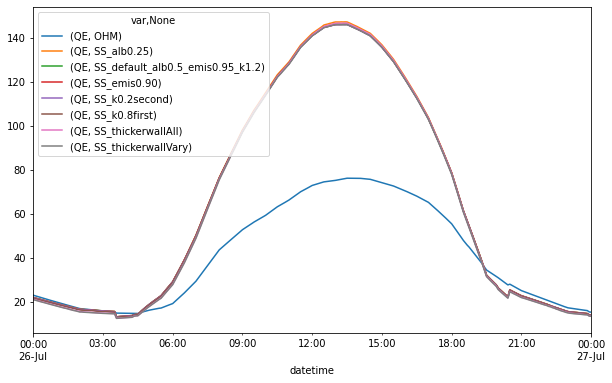

In [23]:
var = 'QE'

df_merge.loc[s:e,[var]].plot(figsize=(10,6))
#df_merge.loc[s:e,[var]]


<AxesSubplot:xlabel='datetime'>

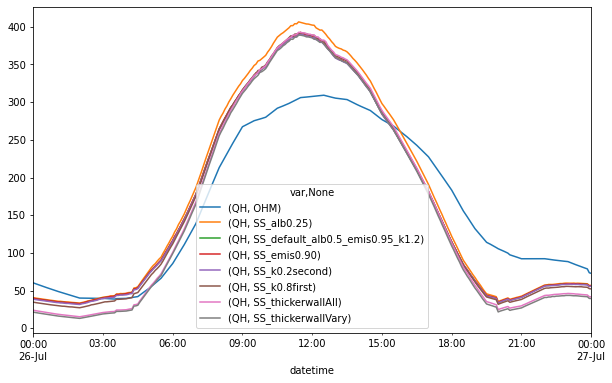

In [24]:
var = 'QH'

df_merge.loc[s:e,[var]].plot(figsize=(10,6))
#df_merge.loc['2012-07-24 11:00': '2012-07-24 11:30',[var]]


<AxesSubplot:xlabel='datetime'>

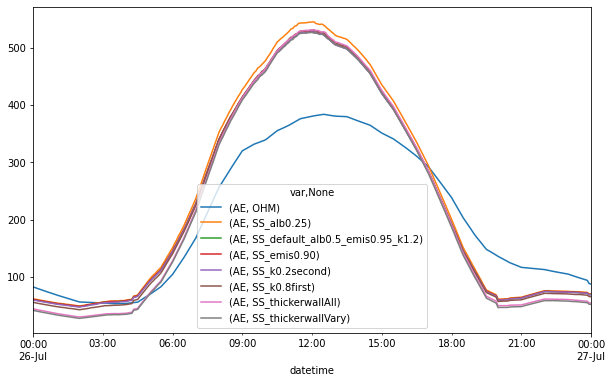

In [25]:
var = 'AE'

df_merge.loc[s:e,[var]].plot(figsize=(10,6))
#df_merge.loc['2012-07-24 11:00': '2012-07-24 11:30',[var]]


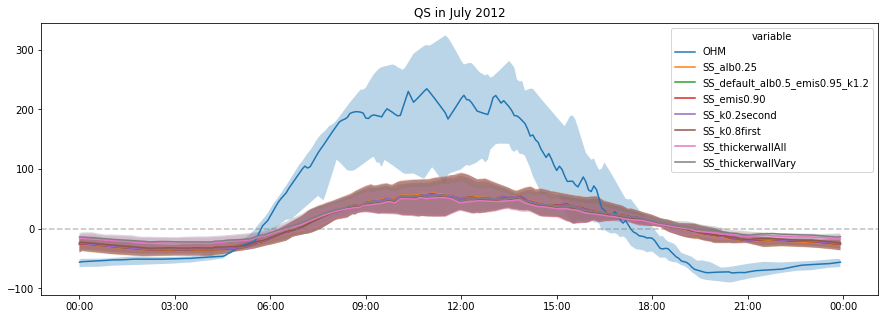

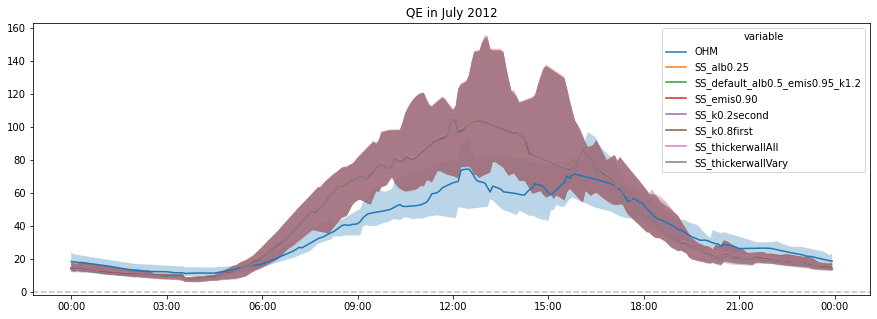

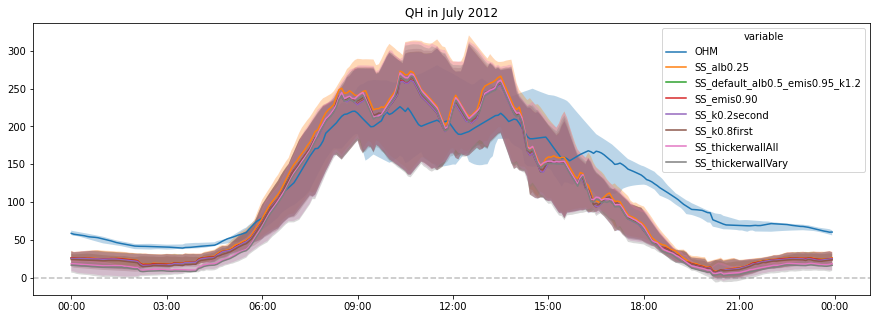

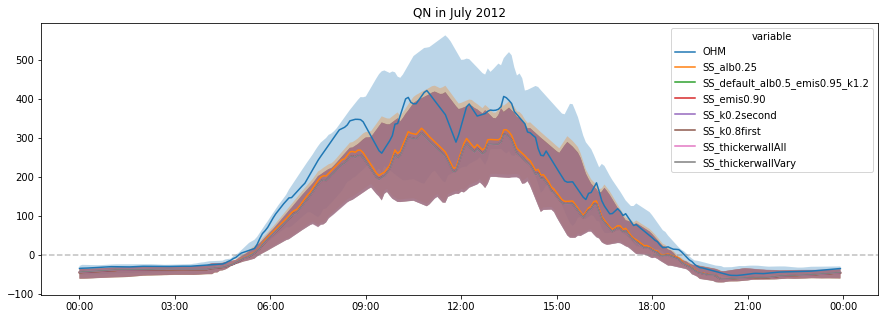

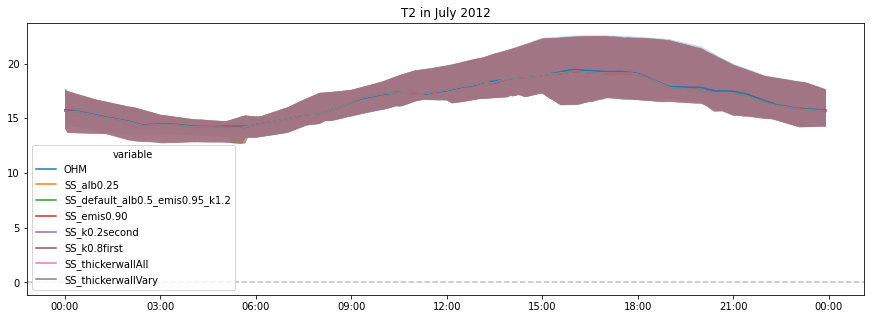

In [26]:

for var in ['QS','QE','QH', 'QN', 'T2']:
    fig, ax = plt.subplots(figsize=(15,5))
    fig,ax=sp.util.plot_day_clm(df_merge.loc['2012 7',var],fig=fig)
    _=ax.set_title(var + ' in July 2012')
    ax.axhline(0,0, linestyle = '--', color = 'grey', alpha = 0.5)




# Säve

In [27]:
# Here come Save airport analysis NOT DONE YET
s_rc = in_folder + 'saveairport_base/RunControl.nml'         # Input data from Säve airport.
df_state_init_save = sp.init_supy(s_rc)


2024-03-19 10:21:13,590 - SuPy - INFO - All cache cleared.


In [28]:
# Metdata
grid = df_state_init_save.index[0]
df_forcing_save = sp.load_forcing_grid(s_rc, grid)


2024-03-19 10:21:14,990 - SuPy - INFO - All cache cleared.


In [29]:
# Load observation data
obsdata = pd.read_csv(in_folder + 'saveairport_base/Saeve_asphalt_QGmeasured_timeadjusted.csv',header=0, sep=';')
obsdata.index = pd.to_datetime('2004') + obsdata['dectime'].sub(1).apply(pd.Timedelta, unit='D').round('min')
#obsdata.index = pd.to_datetime({'year': obsdata['year'],'month':obsdata['month'],'day': obsdata['day']}) + pd.to_timedelta(obsdata['time'])

In [30]:
obsdata

,year,dectime,QgHFP
dectime,,,
2004-02-12 00:30:00,2004,43.0208,-23.3299
2004-02-12 01:00:00,2004,43.0417,-17.3894
2004-02-12 01:30:00,2004,43.0625,-18.9956
2004-02-12 02:00:00,2004,43.0833,-17.8314
2004-02-12 02:30:00,2004,43.1042,-17.5468
...,...,...,...
2004-04-13 10:00:00,2004,104.4167,37.0367
2004-04-13 10:30:00,2004,104.4375,24.0528
2004-04-13 11:00:00,2004,104.4583,68.7589


In [31]:
#testrun
df_output_save, df_state_final_save = sp.run_supy(df_forcing_save, df_state_init_save)

2024-03-19 10:21:17,234 - SuPy - INFO - ====================
2024-03-19 10:21:17,235 - SuPy - INFO - Simulation period:
2024-03-19 10:21:17,236 - SuPy - INFO -   Start: 2004-02-12 00:05:00
2024-03-19 10:21:17,236 - SuPy - INFO -   End: 2004-04-14 21:00:00
2024-03-19 10:21:17,237 - SuPy - INFO - 
2024-03-19 10:21:17,238 - SuPy - INFO - No. of grids: 1
2024-03-19 10:21:17,239 - SuPy - INFO - SuPy is running in serial mode
2024-03-19 10:21:24,861 - SuPy - INFO - Execution time: 7.6 s
2024-03-19 10:21:24,862 - SuPy - INFO - ====================



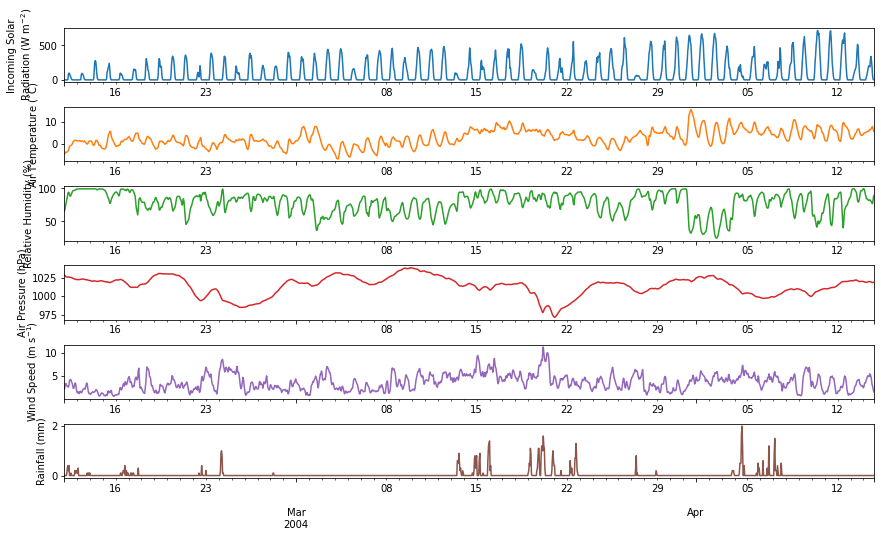

In [32]:
# plot forcing data
df_plot_forcing_x = df_forcing_save.loc[:, list_var_forcing].copy().shift(
    -1).dropna(how='any')
df_plot_forcing = df_plot_forcing_x.resample('1h').mean()
df_plot_forcing['rain'] = df_plot_forcing_x['rain'].resample('1h').sum()

axes = df_plot_forcing.plot(
    subplots=True,
    figsize=(12, 8),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])

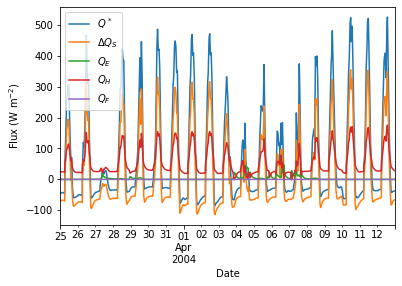

In [33]:
#Plot output for test run
df_output_test = df_output_save['SUEWS']
# a dict for better display variable names
dict_var_disp = {
    'QN': '$Q^*$',
    'QS': r'$\Delta Q_S$',
    'QE': '$Q_E$',
    'QH': '$Q_H$',
    'QF': '$Q_F$',
    'Kdown': r'$K_{\downarrow}$',
    'Kup': r'$K_{\uparrow}$',
    'Ldown': r'$L_{\downarrow}$',
    'Lup': r'$L_{\uparrow}$',
    'Rain': '$P$',
    'Irr': '$I$',
    'Evap': '$E$',
    'RO': '$R$',
    'TotCh': '$\Delta S$',
}
ax_output = df_output_test\
    .loc[grid]\
    .loc['2004 3 25':'2004 4 12',
         ['QN', 'QS', 'QE', 'QH', 'QF']]\
    .rename(columns=dict_var_disp)\
    .plot()
_ = ax_output.set_xlabel('Date')
_ = ax_output.set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
_ = ax_output.legend()

In [34]:
# test to run with ECH and Spartacus
s_rc_a1 = in_folder + 'saveairport_base/RunControl.nml'             # Input data from Säve airport. OHM and NARP
s2_rc_a2 = in_folder + 'saveairport_NarpECH/RunControl.nml'         # Input data from Säve airport. ECH and NARP
s3_rc_a3 = in_folder + 'saveairport_ECHSS/RunControl.nml'          # Input data from Säve airport. ECH and SS

df_state_init_a1 = sp.init_supy(s_rc_a1)
df_state_init_a2 = sp.init_supy(s2_rc_a2)
#df_state_init_a3 = sp.init_supy(s3_rc_a3)

df_output_a1, df_state_final_a1 = sp.run_supy(df_forcing_save, df_state_init_a1)
df_output_a2, df_state_final_a2 = sp.run_supy(df_forcing_save, df_state_init_a2)
#df_output_a3, df_state_final_a3 = sp.run_supy(df_forcing_save, df_state_init_a3) #Crashing

2024-03-19 10:21:30,049 - SuPy - INFO - All cache cleared.
2024-03-19 10:21:31,344 - SuPy - INFO - All cache cleared.
2024-03-19 10:21:32,481 - SuPy - INFO - ====================
2024-03-19 10:21:32,482 - SuPy - INFO - Simulation period:
2024-03-19 10:21:32,483 - SuPy - INFO -   Start: 2004-02-12 00:05:00
2024-03-19 10:21:32,484 - SuPy - INFO -   End: 2004-04-14 21:00:00
2024-03-19 10:21:32,485 - SuPy - INFO - 
2024-03-19 10:21:32,487 - SuPy - INFO - No. of grids: 1
2024-03-19 10:21:32,488 - SuPy - INFO - SuPy is running in serial mode
2024-03-19 10:21:40,183 - SuPy - INFO - Execution time: 7.7 s
2024-03-19 10:21:40,184 - SuPy - INFO - ====================

2024-03-19 10:21:40,185 - SuPy - INFO - ====================
2024-03-19 10:21:40,187 - SuPy - INFO - Simulation period:
2024-03-19 10:21:40,189 - SuPy - INFO -   Start: 2004-02-12 00:05:00
2024-03-19 10:21:40,190 - SuPy - INFO -   End: 2004-04-14 21:00:00
2024-03-19 10:21:40,191 - SuPy - INFO - 
2024-03-19 10:21:40,193 - SuPy - INFO

<AxesSubplot:title={'center':'Testing Qs between OHM and ECH'}, xlabel='datetime'>

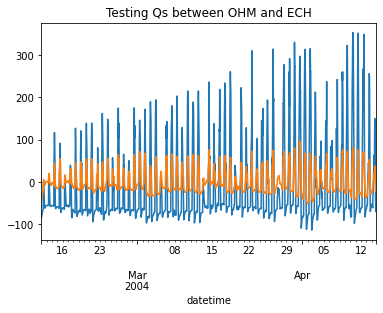

In [35]:
#Quick plot Qs
df_output_a1.SUEWS.loc[grid].loc[:,'QS'].plot(title='Testing Qs between OHM and ECH')
df_output_a2.SUEWS.loc[grid].loc[:,'QS'].plot()

In [36]:
#obsdata['Qg'].replace(999.0, np.nan, inplace=True)
new = df_output_a1.SUEWS.loc[grid]
df_comp = pd.concat([obsdata,new]).resample('1h').mean()

<AxesSubplot:title={'center':'Testing Qs between OHM and observerd data'}>

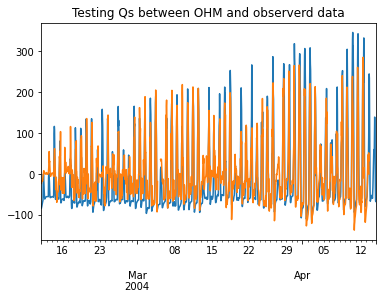

In [37]:
df_comp.loc[:,'QS'].plot(title='Testing Qs between OHM and observerd data')
df_comp.loc[:,'QgHFP'].plot()

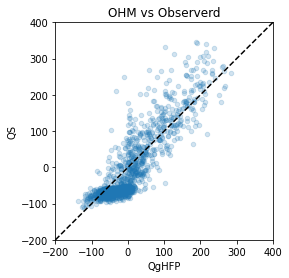

In [38]:
ax = df_comp.plot.scatter(x="QgHFP", y="QS", alpha=0.2, style="..", title='OHM vs Observerd')
_ = ax.set_aspect("equal", "box")
_ = ax.set_xlim(-200, 400)
_ = ax.set_ylim(-200, 400)
_ = ax.plot([-200, 400], [-200, 400], "k--")

In [39]:
# Setting correct ground layer parameters (807 from ESTM coefficients, used in Lindberg et al. 2020)
# EHC as heat storage scheme
df_state_ehc = df_state_init_a2.copy()
df_state_ehc.storageheatmethod = 5

# modify the depth of the vertical layers
ar_depth = np.repeat(np.array([[0.06, 0.3, 0.5, 0.7, 0.01]]), 7, axis=0).flatten() #changed first layer to 0.06 from 0.05 due to instability
df_state_ehc.loc[:, "dz_surf"] = ar_depth

# modify the heat capacity of the vertical layers
ar_cp = np.repeat(np.array([[1.86, 1.86, 1.2, 1.2, 1.2]])*1e6, 7, axis=0).flatten()
df_state_ehc.loc[:, "cp_surf"] = ar_cp

# modify the thermal conductivity of the vertical layers
ar_k = np.repeat(np.array([[0.759, 0.759, 0.63, 0.63, 0.63]]) , 7, axis=0).flatten()
df_state_ehc.loc[:, "k_surf"] = ar_k

df_output_ehc, df_state_final = sp.run_supy(df_forcing_save, df_state_ehc)


2024-03-19 10:22:02,966 - SuPy - INFO - ====================
2024-03-19 10:22:02,967 - SuPy - INFO - Simulation period:
2024-03-19 10:22:02,968 - SuPy - INFO -   Start: 2004-02-12 00:05:00
2024-03-19 10:22:02,970 - SuPy - INFO -   End: 2004-04-14 21:00:00
2024-03-19 10:22:02,971 - SuPy - INFO - 
2024-03-19 10:22:02,972 - SuPy - INFO - No. of grids: 1
2024-03-19 10:22:02,972 - SuPy - INFO - SuPy is running in serial mode


2024-03-19 10:22:15,857 - SuPy - INFO - Execution time: 12.9 s
2024-03-19 10:22:15,858 - SuPy - INFO - ====================



Text(-175, 300, 'y = 0.88x + 1.05\nR$^{2}$ = 0.84')

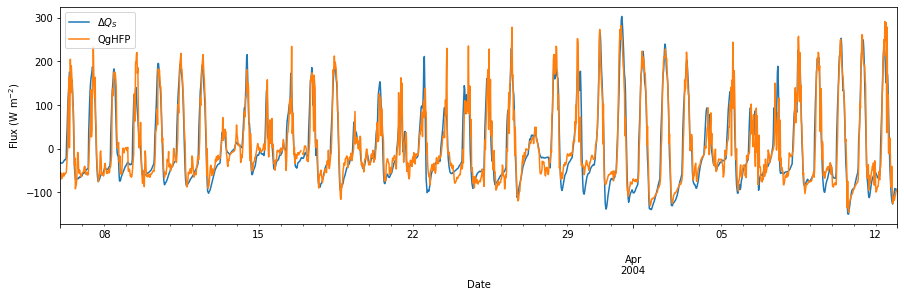

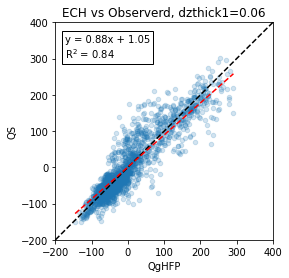

In [51]:
# Plot Qs with adjusted ground values vs observed values

new = df_output_ehc.SUEWS.loc[grid]
df_comp2 = pd.concat([obsdata,new]).resample('30Min').mean()
#df_comp2.loc[:,'QS'].plot(title='Testing Qs between ECH and observerd data')
#df_comp2.loc[:,'QgHFP'].plot()
start = '2004 3 06'
end = '2004 4 12'
ax_output = df_comp2.loc[start:end,['QS', 'QgHFP']].rename(columns=dict_var_disp)\
    .plot(figsize=(15, 4))
_ = ax_output.set_xlabel('Date')
_ = ax_output.set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
_ = ax_output.legend()

data = df_comp2.loc[start:end,['QS', 'QgHFP']].dropna()
# data = df_comp2

ax = data.loc[start:end].plot.scatter(x="QgHFP", y="QS", alpha=0.2, style="..", title='ECH vs Observerd, dzthick1=' + str(ar_depth[0]))
_ = ax.set_aspect("equal", "box")
_ = ax.set_xlim(-200, 400)
_ = ax.set_ylim(-200, 400)
_ = ax.plot([-200, 400], [-200, 400], "k--")

poly4 = polyfiter(data.loc[start:end,'QS'], data.loc[start:end,'QgHFP'],1)    
ax.plot(data.loc[start:end,'QgHFP'].sort_values(), poly4['polynomial'][0] * data.loc[start:end,'QgHFP'].sort_values() + poly4['polynomial'][1], 'r--')    
    
ax.annotate("y = " + str(round(poly4['polynomial'][0], 2)) + "x + " + str(round(poly4['polynomial'][1], 2)) + 
             "\nR$^{2}$ = " + str(round(poly4['determination'], 2)), (-175, 300),ha='left', size=10, 
             bbox=dict(boxstyle="square", fc="none", ec="black"))



In [52]:
df_comp2.loc[start:end,['QS', 'QgHFP']].shape


(1824, 2)

# Kville

In [ ]:
kv_rc = in_folder + 'kville/RunControl.nml'
kvt_rc = in_folder + 'kville_t/RunControl.nml'

df_state_init_kv = sp.init_supy(kv_rc)
df_state_init_kvt = sp.init_supy(kvt_rc)


2024-03-01 10:00:58,855 - SuPy - INFO - All cache cleared.
2024-03-01 10:01:00,793 - SuPy - INFO - All cache cleared.


In [ ]:
# Metdata
grid = df_state_init_kv.index[1]
df_forcing = sp.load_forcing_grid(kv_rc, grid)

2023-08-31 15:58:28,036 - SuPy - INFO - All cache cleared.


In [ ]:
df_forcing = df_forcing.loc['2018-05-28':'2018-06-05']

df_forcing

,iy,id,it,imin,qn,qh,qe,qs,qf,U,...,snow,ldown,fcld,Wuh,xsmd,lai,kdiff,kdir,wdir,isec
2018-05-28 00:00:00,2018,148,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,1.600000,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-05-28 00:05:00,2018,148,0,5,-999.0,-999.0,-999.0,-999.0,-999.0,1.558333,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-05-28 00:10:00,2018,148,0,10,-999.0,-999.0,-999.0,-999.0,-999.0,1.516667,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-05-28 00:15:00,2018,148,0,15,-999.0,-999.0,-999.0,-999.0,-999.0,1.475000,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-05-28 00:20:00,2018,148,0,20,-999.0,-999.0,-999.0,-999.0,-999.0,1.433333,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-05 23:35:00,2018,156,23,35,-999.0,-999.0,-999.0,-999.0,-999.0,1.108333,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-06-05 23:40:00,2018,156,23,40,-999.0,-999.0,-999.0,-999.0,-999.0,1.066667,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-06-05 23:45:00,2018,156,23,45,-999.0,-999.0,-999.0,-999.0,-999.0,1.025000,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-06-05 23:50:00,2018,156,23,50,-999.0,-999.0,-999.0,-999.0,-999.0,0.983333,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0


In [ ]:
df_output_kv, df_state_final_kv = sp.run_supy(df_forcing, df_state_init_kv)
df_output_kvt, df_state_final_kvt = sp.run_supy(df_forcing, df_state_init_kvt)

2023-08-31 15:58:41,529 - SuPy - INFO - ====================
2023-08-31 15:58:41,530 - SuPy - INFO - Simulation period:
2023-08-31 15:58:41,531 - SuPy - INFO -   Start: 2018-05-28 00:00:00
2023-08-31 15:58:41,531 - SuPy - INFO -   End: 2018-06-05 23:55:00
2023-08-31 15:58:41,533 - SuPy - INFO - 
2023-08-31 15:58:41,533 - SuPy - INFO - No. of grids: 15
2023-08-31 15:58:41,535 - SuPy - INFO - SuPy is running in serial mode
